In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc("axes", unicode_minus=False)
plt.rc("font", family="Malgun Gothic")

import pandas as pd

In [2]:
bar_df = pd.read_excel("Data/sample-line.xlsx", index_col='종목명')
print(bar_df.shape)
bar_df.head()

(50, 12)


,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
종목명,,,,,,,,,,,,
삼성전자,1,59700,200,-0.0033,100,3563960,5969783,55.95,24400594,18.68,8.69,NaN
SK하이닉스,2,82900,500,-0.0060,5000,603514,728002,48.86,2872177,26.40,4.25,NaN
NAVER,3,301000,4000,-0.0131,100,494433,164263,55.49,755573,70.16,10.56,NaN
LG화학,4,692000,12000,0.0176,5000,488499,70592,37.61,541159,119.29,1.84,NaN
삼성바이오로직스,5,715000,6000,-0.0083,2500,473080,66165,10.16,75060,137.74,4.77,NaN


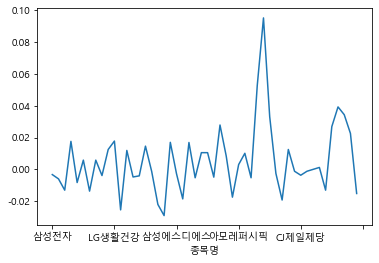

In [4]:
bar_df['등락률'].plot()

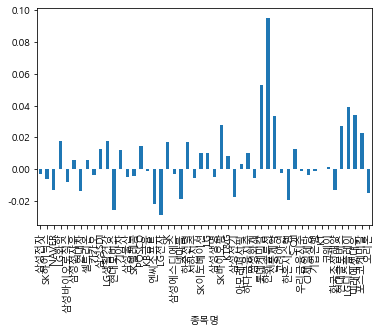

In [5]:
bar_df['등락률'].plot(kind='bar')

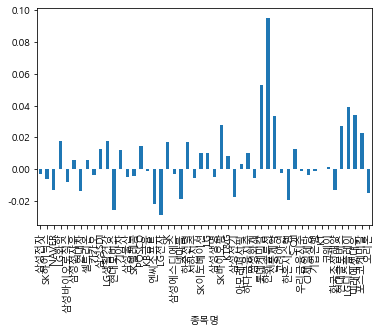

In [6]:
bar_df['등락률'].plot(kind='bar', legend=False)

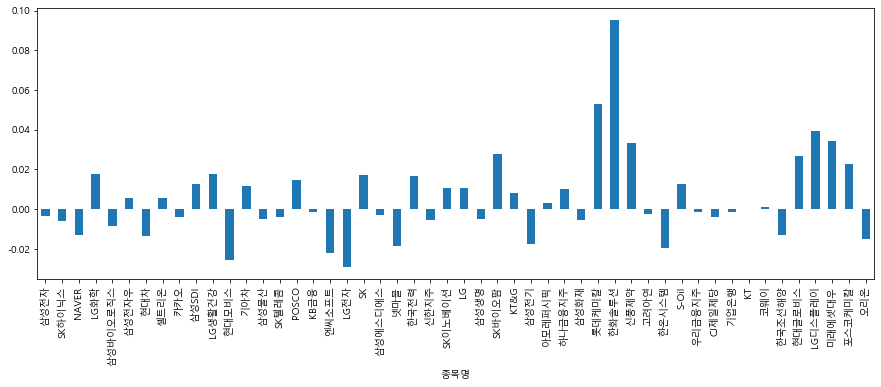

In [7]:
bar_df['등락률'].plot(kind='bar', legend=False, figsize=(15,5))

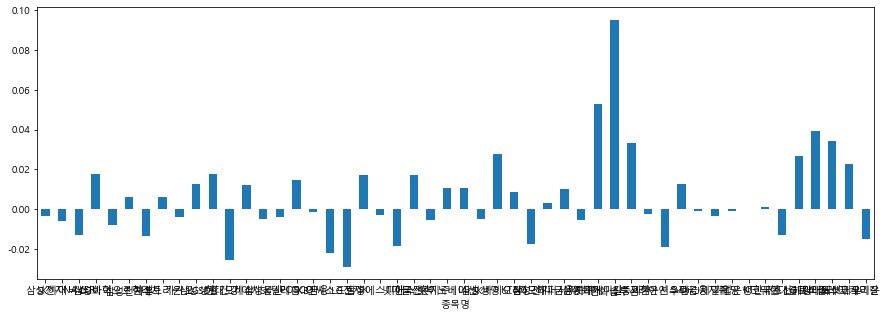

In [12]:
bar_df['등락률'].plot(kind='bar', legend=False, figsize=(15,5), rot=0)  # rot는 x축 레이블명의 표시 방향을 정해줄 수 있다. (기본은 90인 듯)

In [18]:
# 컬럼 추가
bar_df['예상상승률'] = 0.3
print(bar_df.shape)
bar_df.head()

(50, 13)


,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실,예상상승률
종목명,,,,,,,,,,,,,
삼성전자,1,59700,200,-0.0033,100,3563960,5969783,55.95,24400594,18.68,8.69,NaN,0.3
SK하이닉스,2,82900,500,-0.0060,5000,603514,728002,48.86,2872177,26.40,4.25,NaN,0.3
NAVER,3,301000,4000,-0.0131,100,494433,164263,55.49,755573,70.16,10.56,NaN,0.3
LG화학,4,692000,12000,0.0176,5000,488499,70592,37.61,541159,119.29,1.84,NaN,0.3
삼성바이오로직스,5,715000,6000,-0.0083,2500,473080,66165,10.16,75060,137.74,4.77,NaN,0.3


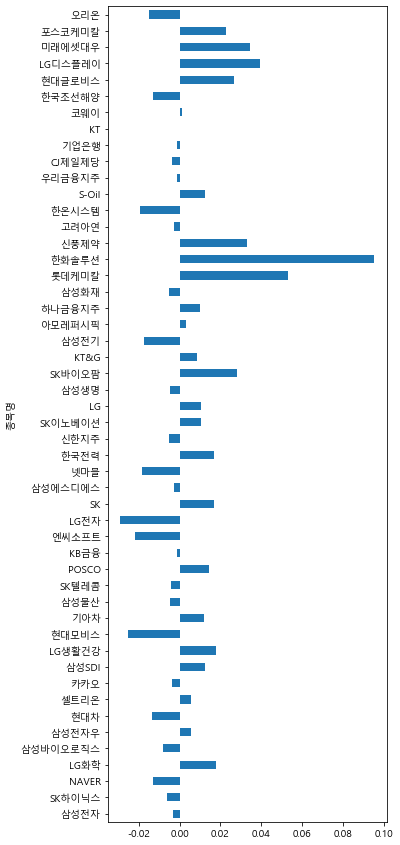

In [23]:
bar_df['등락률'].plot(kind='barh', legend=False, figsize=(5,15))

In [35]:
# bar_df.index
val_01 = bar_df['등락률']
val_02 = bar_df['예상상승률']
bar_df1 = pd.DataFrame({'등락률':val_01, 
                        '예상상승률':val_02}, index=bar_df.index)
print(bar_df1.shape)
bar_df1.head()

(50, 2)


,등락률,예상상승률
종목명,,
삼성전자,-0.0033,0.3
SK하이닉스,-0.0060,0.3
NAVER,-0.0131,0.3
LG화학,0.0176,0.3
삼성바이오로직스,-0.0083,0.3


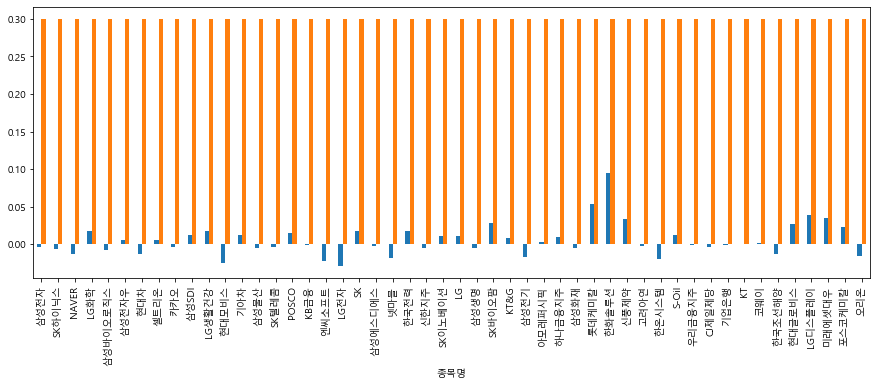

In [36]:
ax = bar_df1.plot(kind='bar', legend=False, figsize=(15,5))

In [37]:
bar_df.head()

,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실,예상상승률
종목명,,,,,,,,,,,,,
삼성전자,1,59700,200,-0.0033,100,3563960,5969783,55.95,24400594,18.68,8.69,NaN,0.3
SK하이닉스,2,82900,500,-0.0060,5000,603514,728002,48.86,2872177,26.40,4.25,NaN,0.3
NAVER,3,301000,4000,-0.0131,100,494433,164263,55.49,755573,70.16,10.56,NaN,0.3
LG화학,4,692000,12000,0.0176,5000,488499,70592,37.61,541159,119.29,1.84,NaN,0.3
삼성바이오로직스,5,715000,6000,-0.0083,2500,473080,66165,10.16,75060,137.74,4.77,NaN,0.3


In [54]:
#%% 파생변수 생성: 예상상승률  (마음대로 계산한 공식! 믿지마세요~)

test_val = bar_df['현재가']/bar_df['액면가']
threshold = -0.01 # -1% 기준
pred_val = bar_df['현재가'] + bar_df['현재가'] * bar_df['등락률']
delta_val = pred_val - bar_df['현재가']  # 내려가면 -값, 올라가면 +값
pred_rate = -(1-(bar_df['현재가']+delta_val)/bar_df['현재가']) # 상승예측: -값, 하락예측: +값
bar_df['예상상승률'] = pred_rate
bar_df.head()

,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실,예상상승률
종목명,,,,,,,,,,,,,
삼성전자,1,59700,200,-0.0033,100,3563960,5969783,55.95,24400594,18.68,8.69,NaN,-0.0033
SK하이닉스,2,82900,500,-0.0060,5000,603514,728002,48.86,2872177,26.40,4.25,NaN,-0.0060
NAVER,3,301000,4000,-0.0131,100,494433,164263,55.49,755573,70.16,10.56,NaN,-0.0131
LG화학,4,692000,12000,0.0176,5000,488499,70592,37.61,541159,119.29,1.84,NaN,0.0176
삼성바이오로직스,5,715000,6000,-0.0083,2500,473080,66165,10.16,75060,137.74,4.77,NaN,-0.0083


In [55]:
# bar_df.index
val_01 = bar_df['등락률']
val_02 = bar_df['예상상승률']
bar_df1 = pd.DataFrame({'등락률':val_01, 
                        '예상상승률':val_02}, index=bar_df.index)
print(bar_df1.shape)
bar_df1.head()

(50, 2)


,등락률,예상상승률
종목명,,
삼성전자,-0.0033,-0.0033
SK하이닉스,-0.0060,-0.0060
NAVER,-0.0131,-0.0131
LG화학,0.0176,0.0176
삼성바이오로직스,-0.0083,-0.0083


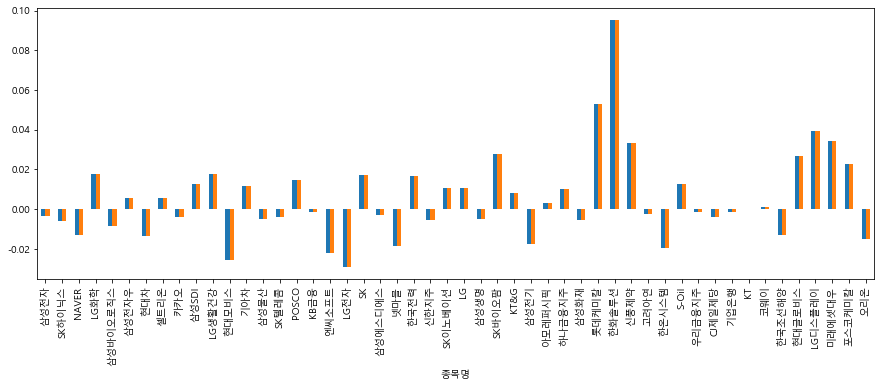

In [56]:
bar_df1.plot(kind='bar', legend=False, figsize=(15,5))

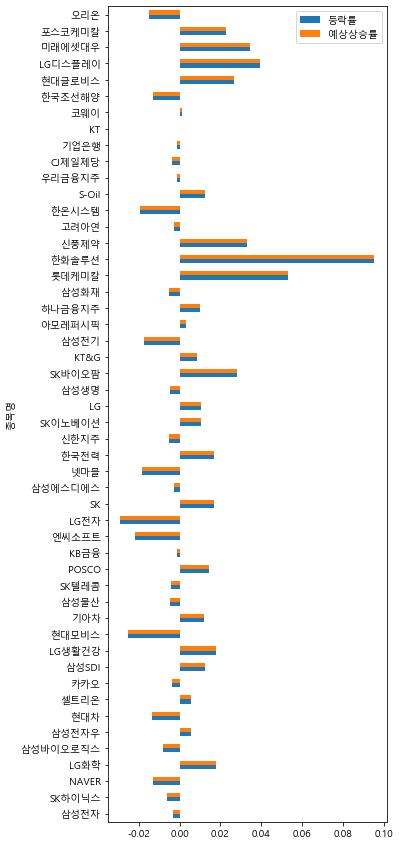

In [58]:
bar_df1.plot(kind='barh', figsize=(5,15))